In [2]:
import yfinance as yf
from yahoo_fin.stock_info import get_data
import pandas as pd
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt



In [3]:
# Downloading  the top 5 companies stock data
amazon_data = yf.download("AMZN", start="2013-01-01", end="2023-12-04", interval="1d")
nvda_data = yf.download("NVDA", start="2013-01-01", end="2023-12-04", interval="1d")
msft_data = yf.download("MSFT", start="2013-01-01", end="2023-12-04", interval="1d")
aapl_data = yf.download("AAPL", start="2013-01-01", end="2023-12-04", interval="1d")
googl_data = yf.download("GOOGL", start="2013-01-01", end="2023-12-04", interval="1d")

# Combining the closing prices into one DataFrame
combined_data = pd.DataFrame({
    'AMZN': amazon_data['Close'],
    'NVDA': nvda_data['Close'],
    'MSFT': msft_data['Close'],
    'AAPL': aapl_data['Close'],
    'GOOGL': googl_data['Close']
})

# Cleaning the data by forward-filling NaN values, then backfill to catch any leading NaNs
combined_data.fillna(method='ffill', inplace=True)
combined_data.fillna(method='bfill', inplace=True)

# Calculating the daily returns as the percentage change in the closing price
daily_returns = combined_data.pct_change()

# Ensuring that no NaN values remain 
daily_returns.dropna(inplace=True)


print(daily_returns.head()) 



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                AMZN      NVDA      MSFT      AAPL     GOOGL
Date                                                        
2013-01-03  0.004547  0.000786 -0.013396 -0.012622  0.000581
2013-01-04  0.002592  0.032993 -0.018716 -0.027855  0.019760
2013-01-07  0.035925 -0.028897 -0.001870 -0.005882 -0.004363
2013-01-08 -0.007748 -0.021926 -0.005245  0.002691 -0.001973
2013-01-09 -0.000113 -0.022418  0.005650 -0.015629  0.006573



C:\Users\ebehnia\AppData\Local\Temp\ipykernel_19692\2317572750.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)
C:\Users\ebehnia\AppData\Local\Temp\ipykernel_19692\2317572750.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='bfill', inplace=True)


 Using an inline calculation to calculate the annual volitility just to display the calculation 


calculate_basic_statistics

[*********************100%%**********************]  5 of 5 completed


Statistical Measures of Daily Returns:
            Mean    Median  Standard Deviation
Ticker                                        
AAPL    0.001047  0.000923            0.017925
AMZN    0.001099  0.001081            0.020615
GOOGL   0.000871  0.000831            0.017259
MSFT    0.001166  0.000852            0.016963
NVDA    0.002240  0.002003            0.028208


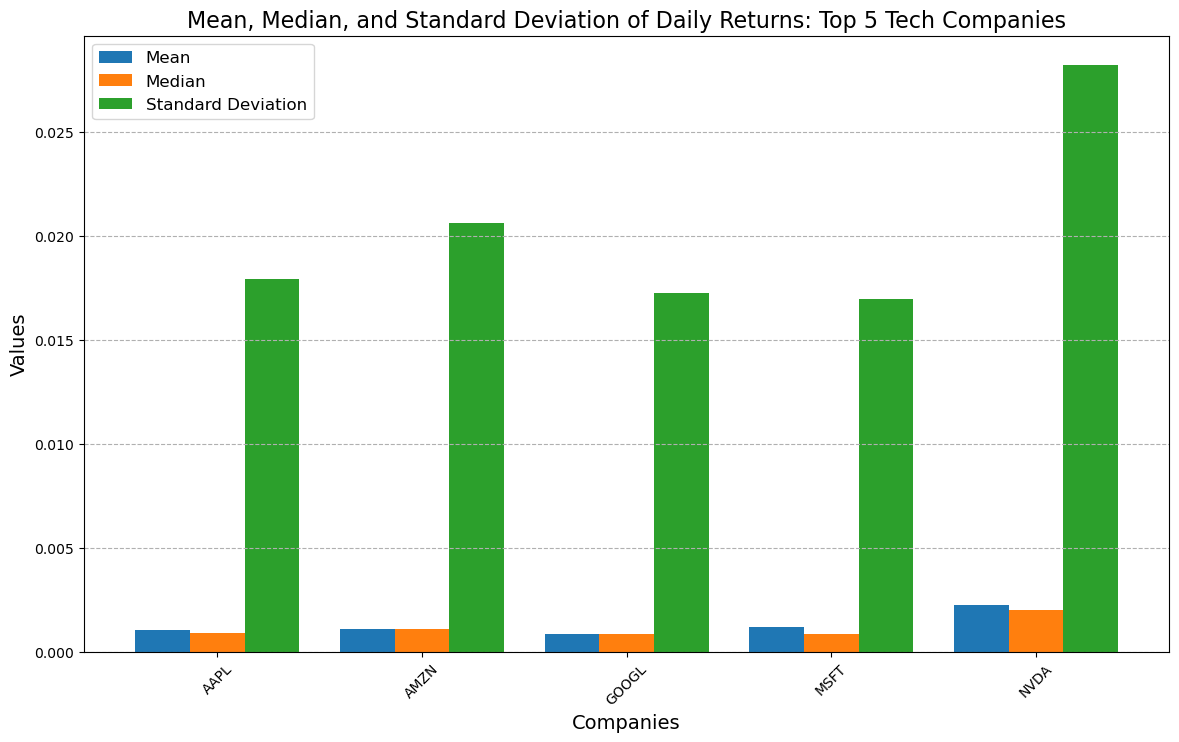

In [4]:
# Define the tickers for the top 5 tech companies
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'NVDA']

# Download historical stock data
data = yf.download(tickers, start="2013-01-01", end="2023-12-04", interval="1d")['Adj Close']

# Calculate daily returns
daily_returns = data.pct_change()

# Calculate mean, median, and standard deviation for each company
stats = pd.DataFrame({
    'Mean': daily_returns.mean(),
    'Median': daily_returns.median(),
    'Standard Deviation': daily_returns.std()
})

# Print the calculated statistics
print("Statistical Measures of Daily Returns:")
print(stats)

# Plotting the statistics for comparison
stats.plot(kind='bar', figsize=(14, 8), width=0.8)

plt.title('Mean, Median, and Standard Deviation of Daily Returns: Top 5 Tech Companies', fontsize=16)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Companies', fontsize=14)
plt.xticks(rotation=45)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--')

plt.show()


# Analysis: snapshot of the performance and risk associated with top tech stocks

This analysis highlights the importance of considering both returns and risk when evaluating investment options in the stock market.

- Mean Daily Returns: is a measure of the average return a stock generates in a day. Higher mean returns suggest better average performance.
NVDA shows the highest mean daily return at 0.002240, indicating it had the best average daily performance among the analyzed stocks.
The stock with the lowest mean daily return is GOOGL at 0.000871, suggesting it had the least average daily performance.

-  Median Daily Returns: indicates the middle value of the daily returns, providing insight into the typical daily performance without the influence of outliers.
Similar to the mean daily returns, NVDA leads with the highest median daily return of 0.002003, reinforcing its position as the top performer on average.
MSFT, despite having a relatively high mean daily return, has a lower median (0.000851), indicating that its average performance might be influenced by some exceptionally positive days.

- Standard Deviation of Daily Returns: measures the volatility or risk associated with the stock's daily returns. Higher values indicate greater variability in daily performance.
NVDA has the highest standard deviation at 0.028208, suggesting that its daily returns vary the most among the stocks analyzed. This indicates higher risk or volatility in NVDA's daily performance.

MSFT shows the lowest standard deviation (0.016963), suggesting it has the most stable or consistent daily returns among these tech giants, implying lower volatility.
Summary:

NVDA stands out as the stock with the highest mean and median daily returns, indicating strong average performance. However, it also has the highest volatility, suggesting higher risk.

MSFT appears to be a more stable investment, with lower volatility in its daily returns, making it potentially more attractive to risk-averse investors.
GOOGL shows the least average daily performance, which might be a point of concern for investors looking for higher short-term gains. Overall, these statistics provide a snapshot of the performance and risk associated with these tech stocks. Investors might prefer NVDA for higher potential returns but must be willing to accept higher volatility. On the other hand, MSFT offers more stability, potentially appealing to those seeking less risk.


# How volatile are the stock prices of the top 5 S&P 500 companies?

Quantifying the risk associated with the price movements of a security over an annual period

In [6]:
# Calculating the standard deviation of daily returns (volatility)
daily_volatility = daily_returns.std()

# Assuming 252 trading days in a year
annual_volatility = daily_volatility * np.sqrt(252)

# Display the annualized volatility
print("Annualized Volatility:")
print(annual_volatility)

Annualized Volatility:
Ticker
AAPL     0.284545
AMZN     0.327251
GOOGL    0.273986
MSFT     0.269286
NVDA     0.447784
dtype: float64


[0.2692858259877331, 0.2739858118241829, 0.28454452542966385, 0.32725068459771145, 0.4477839588350345]


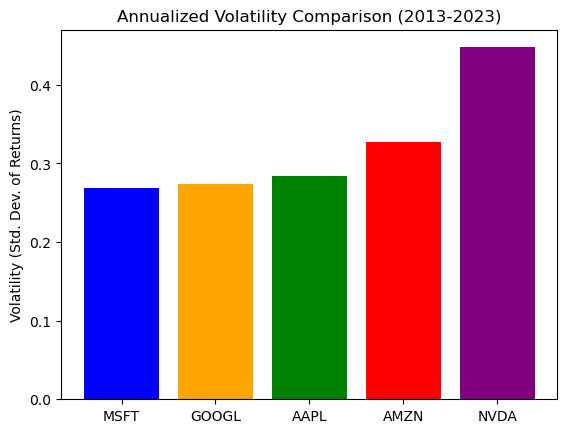

In [10]:
sorted_volatility = dict(sorted(annual_volatility.items(), key=lambda item: item[1]))

# Extracting the sorted keys and values for plotting
companies = list(sorted_volatility.keys())
volatilities = list(sorted_volatility.values())

print(volatilities)


# Plotting the sorted data

plt.bar(companies, volatilities, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Annualized Volatility Comparison (2013-2023)')
plt.ylabel('Volatility (Std. Dev. of Returns)')
plt.show()

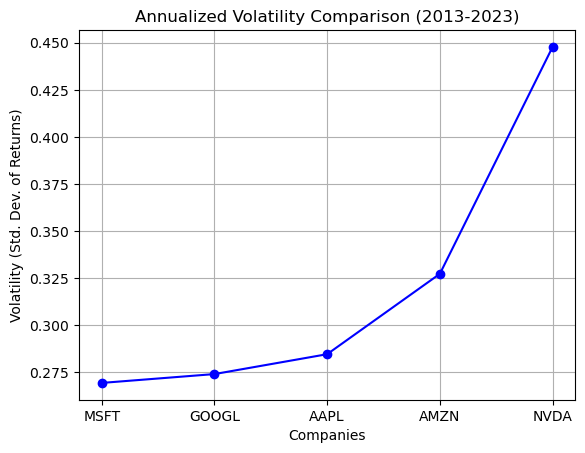

In [9]:

# Plotting the sorted data as a line graph instead of a bar chart

plt.plot(companies, volatilities, marker='o', color='b') # 'b' is the color blue
plt.title('Annualized Volatility Comparison (2013-2023)')
plt.ylabel('Volatility (Std. Dev. of Returns)')
plt.xlabel('Companies')
plt.grid(True)
plt.show()

Nvidia (NVDA) has the highest volatility among the five stocks. Its bar is the tallest, indicating that its stock price has been the most prone to large swings. This suggests that Nvidia's stock has been the most unpredictable and may be considered the riskiest investment of the five if one associates higher volatility with higher risk.

Amazon (AMZN) also shows relatively high volatility, with its bar being the second tallest. This suggests that its stock price also experienced significant fluctuations, although less than Nvidia's.

Microsoft (MSFT) and Apple (AAPL) have similar levels of volatility, as indicated by the nearly equal height of their bars. Their stock prices have been less volatile compared to NVDA and AMZN but still showed notable price movement.

Alphabet (GOOGL) exhibits the lowest volatility among the group, as seen by the shortest bar. This implies that Alphabet's stock price has been the most stable, with the least amount of price swings compared to the others. Investors might consider GOOGL as a less risky investment based on this volatility measure.

# Normalization on the closing prices of stocks

Normalizing stock prices allows for a direct comparison of the performance of different stocks over time, regardless of their absolute price levels.

This is particularly useful for visualizing and comparing the growth rates of different stocks over the same period, enabling investors or analysts to make more informed decisions based on the relative performance (refers to how the return of one asset compares to another over the same period) of these stocks.

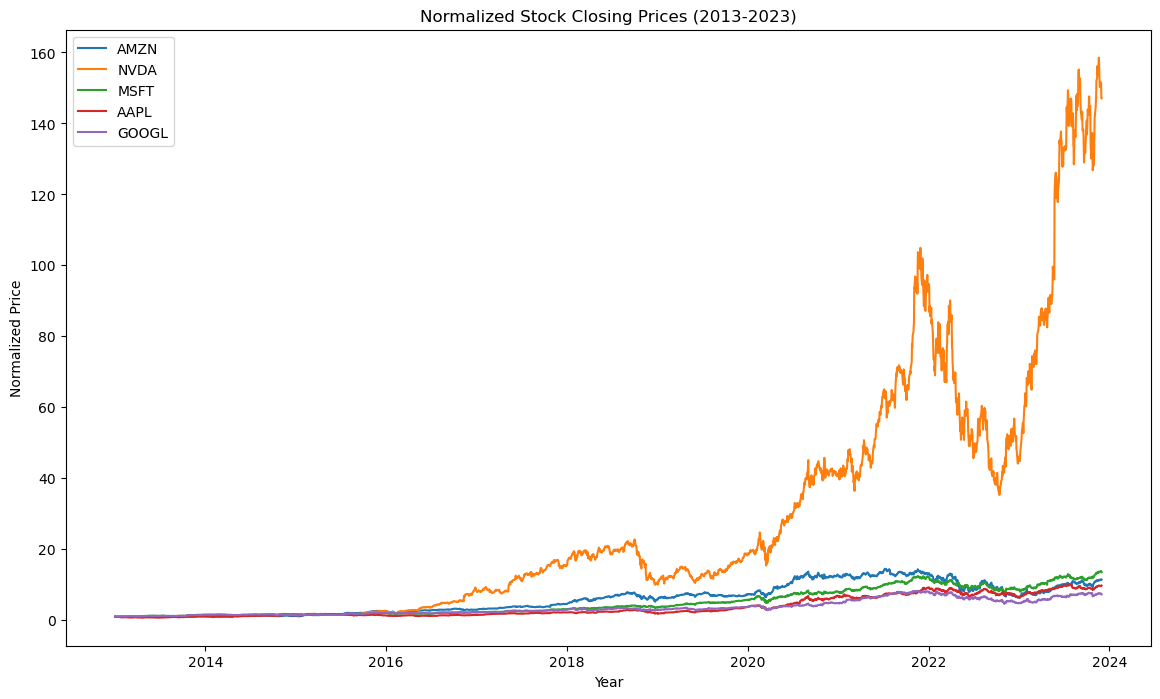

In [23]:
# Normalizing the closing prices
normalized_amzn = amazon_data['Close'] / amazon_data['Close'].iloc[0]
normalized_nvda = nvda_data['Close'] / nvda_data['Close'].iloc[0]
normalized_msft = msft_data['Close'] / msft_data['Close'].iloc[0]
normalized_aapl = aapl_data['Close'] / aapl_data['Close'].iloc[0]
normalized_googl = googl_data['Close'] / googl_data['Close'].iloc[0]

plt.figure(figsize=(14, 8))
plt.plot(normalized_amzn.index, normalized_amzn, label='AMZN')
plt.plot(normalized_nvda.index, normalized_nvda, label='NVDA')
plt.plot(normalized_msft.index, normalized_msft, label='MSFT')
plt.plot(normalized_aapl.index, normalized_aapl, label='AAPL')
plt.plot(normalized_googl.index, normalized_googl, label='GOOGL')
plt.legend()
plt.title('Normalized Stock Closing Prices (2013-2023)')
plt.ylabel('Normalized Price')
plt.xlabel('Year')
plt.show()




Nvidia (NVDA): The orange line, representing NVDA, shows the most significant growth over this period. It indicates that Nvidia's stock has far outperformed the others in terms of cumulative returns, with the value soaring especially after 2020 before experiencing a sharp downturn and then rising again.

Amazon (AMZN): The blue line, while showing growth, has not experienced the same dramatic increase as Nvidia. It demonstrates a steady increase over the decade, with some fluctuations.

Microsoft (MSFT), Apple (AAPL), and Alphabet (GOOGL): These stocks have followed a relatively similar trajectory, indicating moderate growth. They are less volatile compared to NVDA and have grown at a more stable rate.

The sharp drop seen in all stocks around 2020 could be indicative of a market-wide event, such as the economic impact of the COVID-19 pandemic, which caused significant downturns in many global markets.

The graph indicates that while all these companies have grown over the last decade, the extent and nature of growth vary. NVIDIA's stock price increase suggests that the company may have had significant developments or successful product launches, leading to increased investor optimism.

The graph uses normalized prices, which means it shows the relative performance of each stock from a common starting point, not the actual stock price.

While all the tech stocks have shown growth over the period, NVDA stands out with remarkable growth, especially post-2020. The other stocks have shown more stable and less dramatic growth patterns. Investors looking at this graph would likely be impressed with NVDA's growth but might also consider the stability of the other tech giants depending on their risk appetite.


[*********************100%%**********************]  6 of 6 completed


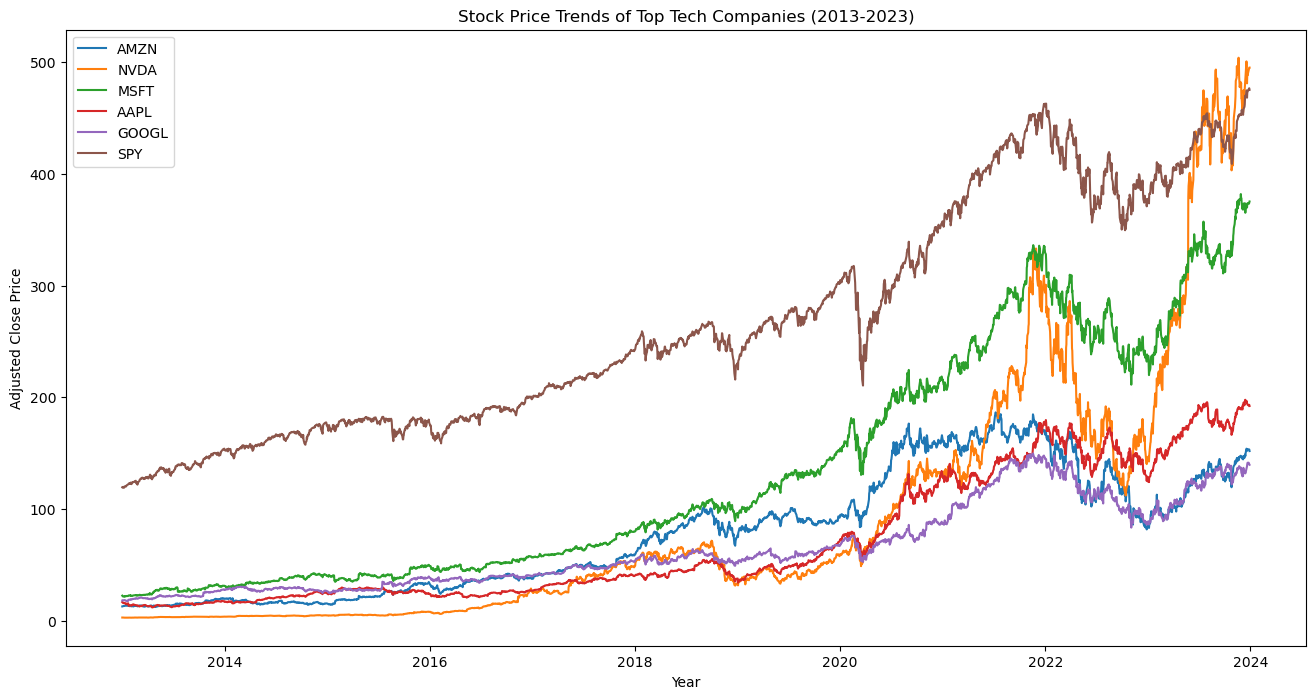

In [22]:

# Getting the historical adjusted close prices for all tickers at once
data = yf.download(tickers, start='2013-01-01', end='2023-12-31')['Adj Close']

# Ploting the stock price trends
plt.figure(figsize=(16, 8))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title('Stock Price Trends of Top Tech Companies (2013-2023)')
plt.xlabel('Year')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

The graph above  shoes the actual adjusted closing prices of the stocks over time.

Adjusted close prices account for dividends and other corporate actions, providing a more accurate picture of the stock's value.
This graph shows the actual value trends of the stocks and to understand their behavior in real monetary terms.

It appears that all stocks, particularly Amazon (AMZN) and NVIDIA (NVDA), have experienced significant growth, with NVDA showing substantial volatility and a sharp rise in value after 2020.

# 30-day Rolling Volatility

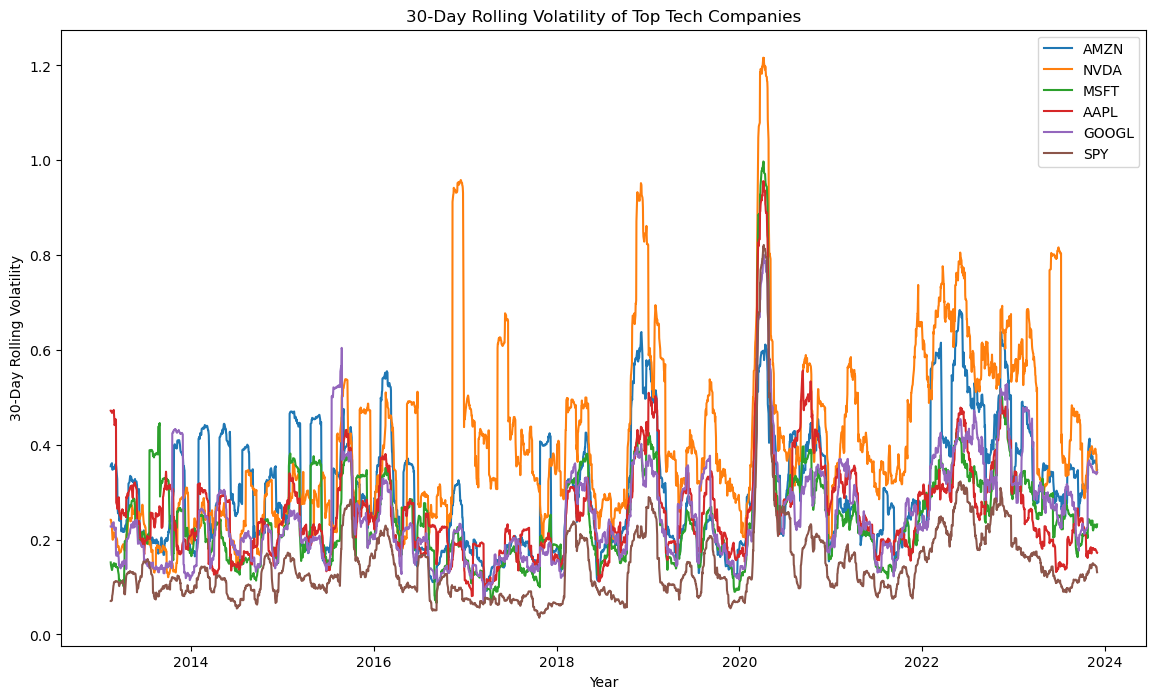

In [20]:
# Calculating 30-day rolling volatility
rolling_volatility = daily_returns.rolling(window=30).std() * np.sqrt(252)

# Ploting the rolling volatility
plt.figure(figsize=(14, 8))
for ticker in tickers:
    plt.plot(rolling_volatility.index, rolling_volatility[ticker], label=ticker)
plt.title('30-Day Rolling Volatility of Top Tech Companies')
plt.xlabel('Year')
plt.ylabel('30-Day Rolling Volatility')
plt.legend()
plt.show()

The graph above provides a visual representation of how volatile each company's stock price has been over the past several years, with the rolling window providing a continuous update as new data becomes available.

Rolling volatility measures the standard deviation of a stock's price returns over a rolling window of a specified period, which is 30 days in this case. 

It represents how much the stock's returns can vary from their average over a given period. A higher volatility means that a stock's price can change dramatically over a short time period in either direction, while a lower volatility means that the stock's price does not fluctuate as dramatically.


The y-axis shows the volatility level. 
The x-axis represents time, with the years marked from 2013 to 2024.




# Beta (β)
Beta measures a stock's volatility relative to the overall market or a specific benchmark (like the S&P 500). A beta greater than 1 indicates that the stock is more volatile than the market, while a beta less than 1 means it's less volatile.


In [18]:

# Calculating the daily returns
daily_returns = data.pct_change()

# Calculating the covariance of each stock with the S&P 500
covariance = daily_returns.cov().loc[tickers[:-1], 'SPY']

# Calculating the variance of the S&P 500
variance = daily_returns['SPY'].var()

# Calculating beta for each stock
beta = covariance / variance

print("Beta values relative to S&P 500:")
print(beta)

Beta values relative to S&P 500:
Ticker
AMZN     1.164302
NVDA     1.656721
MSFT     1.205973
AAPL     1.183231
GOOGL    1.156353
Name: SPY, dtype: float64


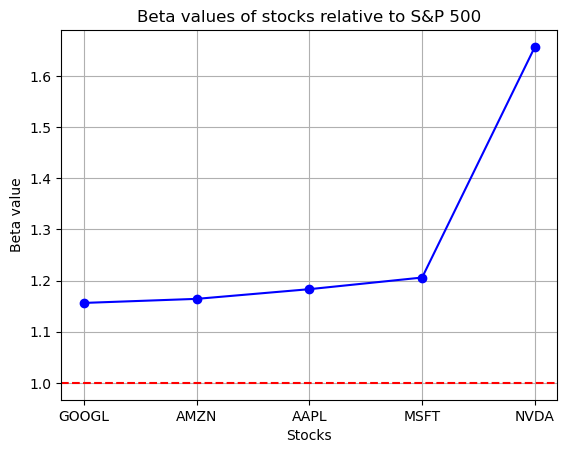

In [17]:

# Sorting the beta values 
sorted_beta = beta.sort_values()

plt.plot(sorted_beta.index, sorted_beta.values, marker='o', linestyle='-', color='blue')
plt.title('Beta values of stocks relative to S&P 500')
plt.xlabel('Stocks')
plt.ylabel('Beta value')
plt.grid(True)
plt.axhline(y=1, color='r', linestyle='--') # Line indicating the market beta
plt.show()

# Analysis 

### Amazon (AMZN) - Beta: 1.1643
Amazon's beta value suggests that its stock is slightly more volatile than the market. A movement in the S&P 500 is expected to lead to a slightly larger movement in Amazon's stock price, making it somewhat riskier than an average stock in the index.

### Nvidia (NVDA) - Beta: 1.6567
Nvidia's beta is significantly higher than 1, indicating that its stock is much more volatile than the market. This suggests that Nvidia's stock price is likely to experience larger fluctuations in response to market movements, which could imply higher risk but also the potential for higher returns.

### Microsoft (MSFT) - Beta: 1.2060
Microsoft's beta value is also above 1, indicating that its stock is more volatile than the market but to a lesser extent than Nvidia. This means Microsoft's stock price may move more than the market average in response to market changes, offering a mix of additional risk and potential return.

### Apple (AAPL) - Beta: 1.1832
Apple's beta value is similar to Microsoft's and Amazon's, showing that its stock is more volatile than the market but not excessively so. Apple's stock movements are likely to be somewhat more pronounced than the market's, reflecting a moderate level of risk relative to the S&P 500.

### Alphabet (GOOGL) - Beta: 1.1564
Alphabet's beta value is slightly above 1, similar to Amazon's, indicating that its stock has a slightly higher volatility than the market. This suggests Alphabet's stock price may react somewhat more to market movements, posing a slightly higher risk compared to an average market stock.

In [14]:
# Calculating the daily returns
daily_returns = data.pct_change()

# Calculating the 95% VaR using the Historical Method
VaR_95 = daily_returns.quantile(0.05)

# Converting VaR to positive values for conventional representation
VaR_95 = -VaR_95

print("95% Value at Risk (VaR) for each stock:")
print(VaR_95)

95% Value at Risk (VaR) for each stock:
Ticker
AAPL     0.026661
AMZN     0.030576
GOOGL    0.025378
MSFT     0.025683
NVDA     0.040815
SPY      0.016152
Name: 0.05, dtype: float64


The maximum expected loss over a given time period (usually a day) with 95% confidence:

VaR gives an investor an estimate of how much they might lose, with a 95% chance that the loss will not exceed this amount.

AAPL (Apple Inc.) has a 95% VaR of 2.6661%, meaning there is a 95% chance that AAPL's value will not decrease by more than 2.6661% on any given day.

AMZN (Amazon.com Inc.) shows a slightly higher VaR at 3.0576%, indicating a slightly higher risk of daily loss compared to AAPL.

GOOGL (Alphabet Inc.) and MSFT (Microsoft Corporation) have similar VaR values at 2.5378% and 2.5683%, respectively, suggesting that their potential for loss in a single day is lower than AAPL and AMZN, with a 95% confidence level.

NVDA (NVIDIA Corporation) presents the highest VaR at 4.0815%, signaling that it is the riskiest of the listed stocks in terms of potential daily loss.

SPY, (Which mimics the performance of the S&P 500,  a group of 500 large companies listed on stock exchanges in the UnitedStates), a diversified stock market index, has the lowest VaR at 1.6152%. 


Overall, NVDA is the most volatile with the highest potential loss in a day at the 95% confidence level, while SPY is the least, reflecting the reduced risk associated with a diversified portfolio. AMZN carries more risk than AAPL, GOOGL, and MSFT, but less than NVDA. These VaR figures are critical for investors in assessing and comparing the risk profile of different stocks and making informed decisions aligned with their risk tolerance.